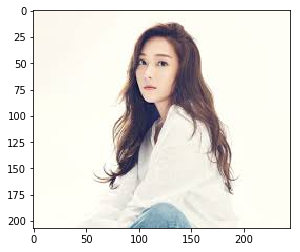

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
I1 = mpimg.imread('./images/jessica2.jpg')
plt.imshow(I1)

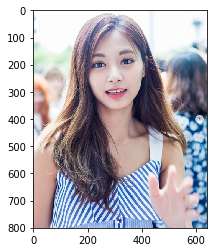

In [15]:
I2 = mpimg.imread('./images/子瑜3.jpg')
plt.imshow(I2)

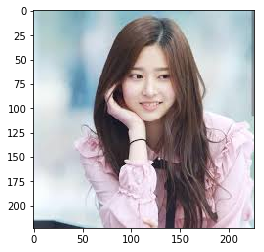

In [16]:
I3 = mpimg.imread('./images/敏珠2.jpg')
plt.imshow(I3)

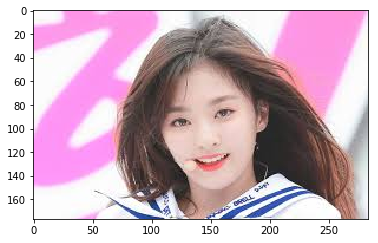

In [17]:
I4 = mpimg.imread('./images/娜炅2.jpg')
plt.imshow(I4)

In [51]:
flist = ['./images/jessica2.jpg','./images/子瑜8.jpg','./images/敏珠2.jpg','./images/娜炅2.jpg']

In [52]:
import face_recognition
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

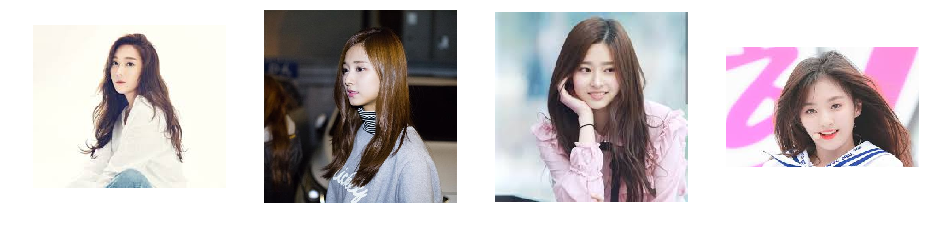

In [53]:
import os
# 最後要記錄出的樣品向量(128 維度) 和標籤(明星名)
encodinglist = []
labels = []
# 一橫列畫幾個人
width = 5
# 總共幾個橫列
height = int(len(flist) / width) + 1
# 整個大圖的size
plt.figure(figsize=(20, 5))
for (i, f) in enumerate(flist):
# Step1. 讀取檔案
    img = face_recognition.load_image_file(f)
# Step2. 把臉的降維向量算出, 用已經做好的cnn, [0] 第一張臉
    face_encoding = face_recognition.face_encodings(img)[0]
# Step3. 抓出臉的方框, 我們這裡沒用到, 但如果你想畫框就會需要
# 這裡的face_locations 可以使用cnn(深度學習) 或者haar(固定特徵) 來得到
# 如果需要快速, 請使用haar, 如果需要更準確, 就使用cnn, 建議可以使用預設haar 即可
    (top, right, bottom, left) = face_recognition.face_locations(img, model="cnn")[0]
# Step4. 把它加到我自己準備的list 裡
    encodinglist.append(face_encoding)
# Step5. 把檔名前面的人名split 出來
    name = os.path.split(f)[-1].split(".")[0]
# Step6. 把人名到我自己準備的list
    labels.append(name)
# 利用enumerate 得到的i 指定subplot
    plt.subplot(height, width, i + 1)
    plt.axis("off")
    plt.imshow(img)

In [57]:
unknown_flist =['./images/子瑜9.jpg']

In [58]:
# 秀一下志玲的臉降維過後的向量
print("維度:", len(encodinglist[0]))
encodinglist[0]

維度: 128


array([-0.06660247,  0.06906231,  0.04460184, -0.11547992, -0.07898794,
        0.02520313, -0.10765206, -0.07600819,  0.12623821, -0.18593614,
        0.21636373, -0.10072264, -0.16684572, -0.01188399, -0.11571485,
        0.23725528, -0.15430757, -0.15499769,  0.01129061,  0.02280146,
        0.0827512 ,  0.08040823, -0.03739148,  0.05618707, -0.11060014,
       -0.30806902, -0.08687665, -0.03205048,  0.00060651, -0.07669333,
       -0.03936208,  0.1125905 , -0.1572345 ,  0.04952295,  0.0431981 ,
        0.15378454,  0.02552737, -0.0644241 ,  0.17996535,  0.0619887 ,
       -0.32822266,  0.07554647,  0.08793803,  0.27728313,  0.16650319,
       -0.05238048, -0.05297742, -0.15002573,  0.11545027, -0.2232556 ,
        0.04714993,  0.1290549 ,  0.10212305,  0.08470199,  0.00601839,
       -0.07416748,  0.08493681,  0.08410172, -0.18546553, -0.03173589,
        0.09312781, -0.11441223,  0.07876539, -0.09185365,  0.15878065,
        0.11693326, -0.06136553, -0.25232476,  0.09205535, -0.20

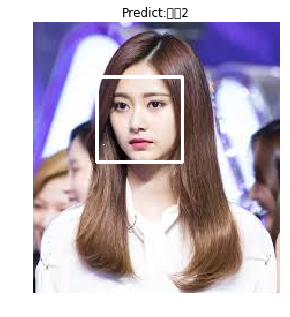

In [59]:
import numpy as np
plt.figure(figsize=(15, 15))
width = 3
height = int(len(unknown_flist) / width) + 1
for (i, f) in enumerate(unknown_flist):
    img = face_recognition.load_image_file(f)
    face_encoding = face_recognition.face_encodings(img)[0]
    # (top, right, bottom, left)
    (top, right, bottom, left) = face_recognition.face_locations(img)[0]
    # rectangle(要畫的圖, 左上座標, 右下座標, 顏色, 粗細)
    size = int(img.shape[0] / 100)
    cv2.rectangle(img, (left, top), (right, bottom), (255, 255, 255), size)
    font = cv2.FONT_HERSHEY_DUPLEX
    # face_distance-> 算跟妳傳進去的encodinglist 每一個距離
    results = face_recognition.face_distance(encodinglist, face_encoding)
    # 這裡使用argmin(axis=-1) 稍微難一點, 是得到群集裡最小值的index 部分
    name = labels[np.array(results).argmin(axis=-1)]
    labels.append(name)
    # 把文字放到我的圖上, 文字放在框右移6, 上移15 的位置
    # putText(圖片, 標籤, 起始座標, 字型, 字型大小, 顏色, 粗細)
    # 這裡我有刻意根據框的大小調整字體大小, 如果讀者沒特別需求可以都設成1
    cv2.putText(img, name, (left + 6, bottom - 15),
    font, (right-left)//100 ,
    (255, 255, 255), (right-left)//75)
    plt.subplot(height, width, i + 1)
    plt.title("Predict:" + name)
    plt.axis("off")
    plt.imshow(img)

In [60]:
# 妳可以把跟所有臉的距離列出來, 最小值基本上就是我們的答案
img = face_recognition.load_image_file(unknown_flist[-1])
face_encoding = face_recognition.face_encodings(img)[0]
results = face_recognition.face_distance(encodinglist, face_encoding)
for (i, r) in enumerate(results):
    print("和", labels[i], "的距離:", r)

和 jessica2 的距離: 0.4224573361905439
和 子瑜8 的距離: 0.40902205723258034
和 敏珠2 的距離: 0.3028485798097832
和 娜炅2 的距離: 0.5413591649530716
